# Task # 2 - To Explore Supervised Machine Learning

Author : parsha sravan kumar

 ## In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. 

# Q: What will be predicted score if a student study for 9.25 hrs in a day? 

## Importing libraries 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
import wget

In [5]:
wget.download('http://bit.ly/w-data')

100% [..................................................................................] 212 / 212

'w-data'

## Importing data

In [3]:
df = pd.read_csv("http://bit.ly/w-data")

# take a look at the dataset
df.head()



,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Analysing Data

In [4]:
# summarize the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
cdf = df[['Hours','Scores']]
cdf.head(9)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81


# Data Visualisation 

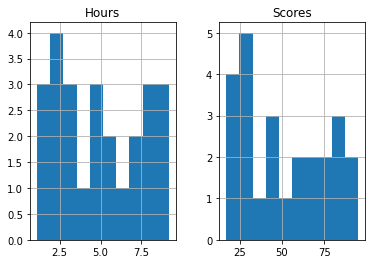

In [6]:
viz = cdf[['Hours','Scores']]
viz.hist()
plt.show()

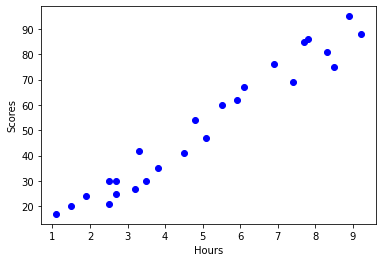

In [7]:
plt.scatter(cdf.Hours, cdf.Scores,  color='blue')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [8]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Training Data Set

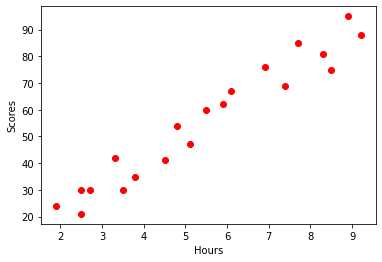

In [9]:
plt.scatter(train.Hours, train.Scores,  color='red')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [11]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.array(train[['Hours']])
train_y = np.array(train[['Scores']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9.63005231]]
Intercept:  [3.11621493]


Text(0, 0.5, 'Scores')

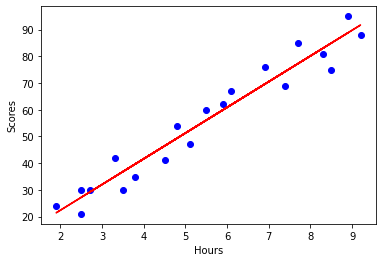

In [12]:
plt.scatter(train.Hours, train.Scores,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Hours")
plt.ylabel("Scores")

## Mean Absolute error

In [13]:
from sklearn.metrics import r2_score

test_x = np.array(test[['Hours']])
test_y = np.array(test[['Scores']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))


Mean absolute error: 4.91


In [14]:
f=test_x
f_dataframe = pd.DataFrame(f, columns=['test_x'])
f_dataframe


,test_x
0,3.2
1,1.5
2,2.7
3,1.1
4,7.8


In [15]:
f=test_y_hat
df2 = pd.DataFrame(f, columns=['predicted value'])
f=test_y
df1 = pd.DataFrame(f, columns=['actual'])
df_add = df1.add(df2, fill_value=0)
df_add

,actual,predicted value
0,27.0,33.932382
1,20.0,17.561293
2,25.0,29.117356
3,17.0,13.709272
4,86.0,78.230623


<function matplotlib.pyplot.show(*args, **kw)>

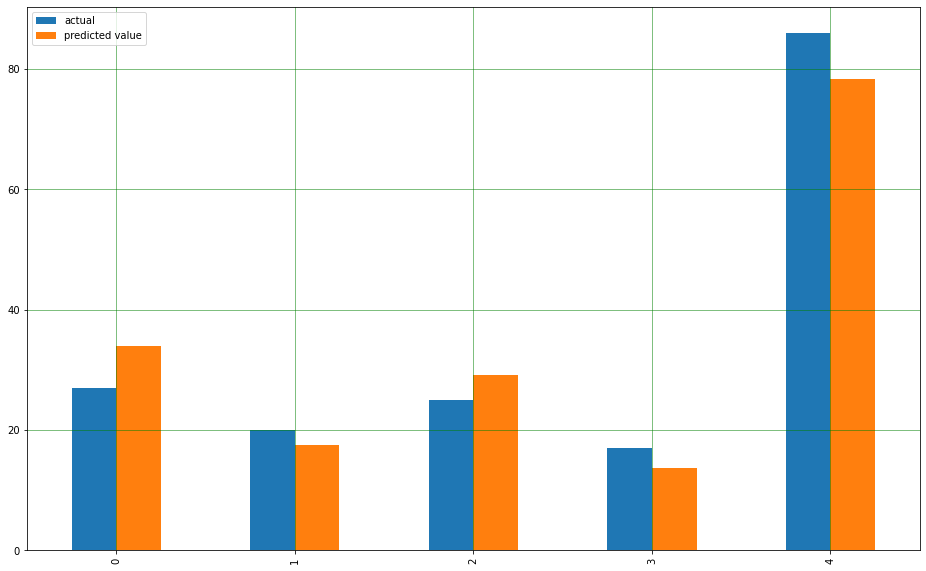

In [17]:
df_add.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle='-',linewidth='0.5',color='black')
plt.show

## Residual Sum Of Squares

In [18]:
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))


Residual sum of squares (MSE): 28.43


## Evaluating  R2-score

In [19]:
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

R2-score: 0.95


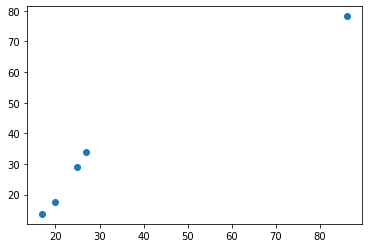

In [20]:
plt.scatter(test_y,test_y_hat)

# predicting the score of student studying 9.25 hrs a day ?

In [21]:
percentage_score=regr.predict(np.array(9.25).reshape(-1,1)).round(5)
if percentage_score <=100:
    print(f'obtained score = {percentage_score}')

obtained score = [[92.1942]]
